In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset

df = pd.read_csv('emp_turn_over.csv').rename(columns={'sales': 'job_type','average_montly_hours': 'average_monthly_hours'})


# Giving a unique id for each employee

emp_id = ['EMP'+str(i) for i in range(1,len(df)+1)]
df['emp_id'] = emp_id

df = df[['emp_id','satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'job_type', 'salary','left']]


# Display first 5 rows of data
print("Shape of Dataset :",df.shape)
df.head()


Shape of Dataset : (14999, 11)


,emp_id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,job_type,salary,left
0,EMP1,0.38,0.53,2,157,3,0,0,sales,low,1
1,EMP2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,EMP3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,EMP4,0.72,0.87,5,223,5,0,0,sales,low,1
4,EMP5,0.37,0.52,2,159,3,0,0,sales,low,1


In [3]:
# Function returning Categorical columns

def cat_cols(df):
    return list(df.select_dtypes(include='object').columns)

print("Categorical Columns :\n",cat_cols(df))

# Function returning Numerical columns

def num_cols(df):
    return list(df.select_dtypes(include=np.number).columns)

print("\nNumerical Columns :\n",num_cols(df))


Categorical Columns :
 ['emp_id', 'job_type', 'salary']

Numerical Columns :
 ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']


In [4]:
# Info about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
emp_id                   14999 non-null object
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
job_type                 14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [5]:
# Statistics of the data

df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

## Univariate Analysis

In [6]:
# Function to plot histograms

def hist_plotter(df,column,title,color='blue'):
    
    plt.figure(figsize=[9,7])
    plt.hist(df[column],color=color)
    plt.title("Histogram of " + title,fontsize=20)
    plt.xlabel(column,fontsize=17)
    plt.ylabel("Count",fontsize=17)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    return plt.show()

In [7]:
# Function to plot countplots

def count_plotter(df,column,title,rotation=0):
    
    plt.figure(figsize=[9,7])
    sns.countplot(df[column])
    plt.title("Countplot of " + title,fontsize=20)
    plt.xlabel(column,fontsize=17)
    plt.ylabel("Count",fontsize=17)
    plt.xticks(fontsize=14,rotation=rotation)
    plt.yticks(fontsize=14)
    
    return plt.show()

In [8]:
# Columns of dataset

list(df.columns)

['emp_id',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'job_type',
 'salary',
 'left']

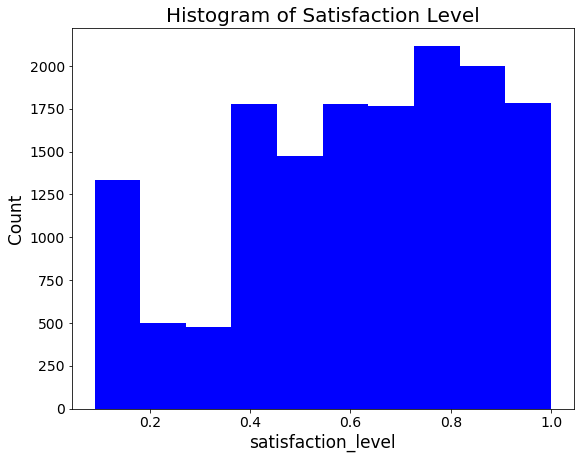

In [9]:
# Histogram for Satisfaction level of Employees

hist_plotter(df,'satisfaction_level',"Satisfaction Level")

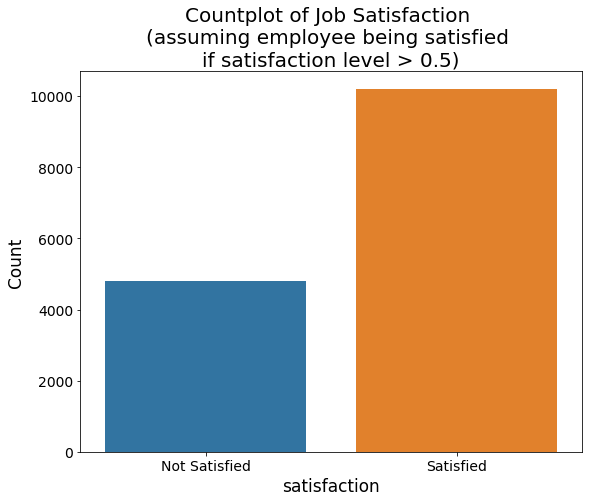

In [10]:
# Assuming 0.5 as the boundary, checking how many employees are satisfied / not satisfied with their jobs

df['satisfaction'] = pd.Series(np.where(df.satisfaction_level > 0.5, 1, 0)).replace({0: 'Not Satisfied',1: 'Satisfied'})
count_plotter(df,'satisfaction','Job Satisfaction \n(assuming employee being satisfied \nif satisfaction level > 0.5)')


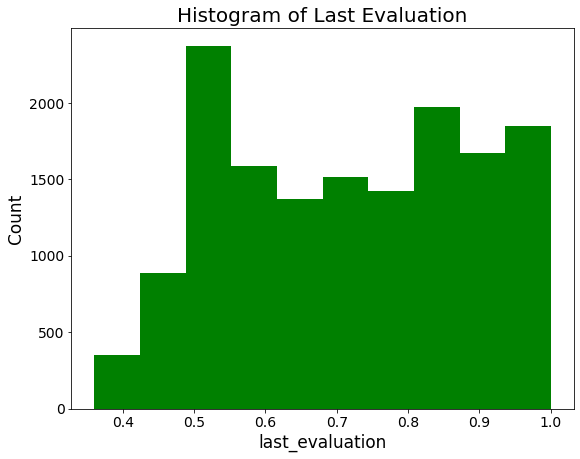

In [11]:
# Histogram for last evaluaton of  employees

hist_plotter(df,'last_evaluation','Last Evaluation','green')

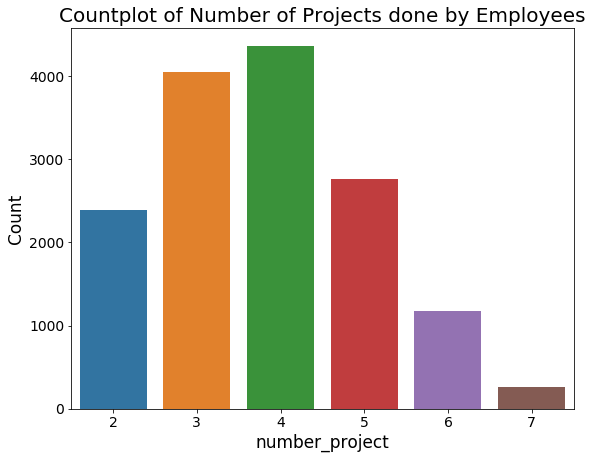

In [12]:
# Countplot of projects done by Employees

count_plotter(df,'number_project','Number of Projects done by Employees')

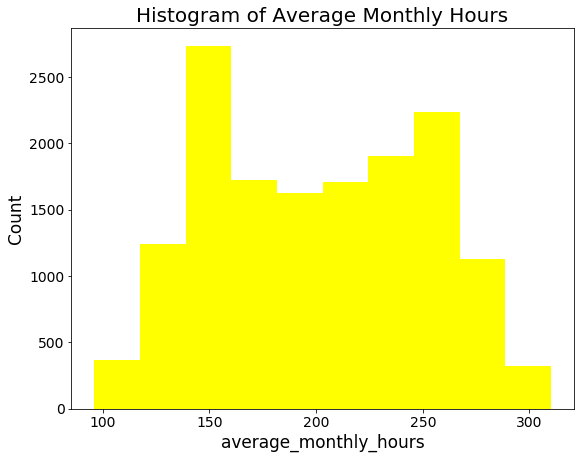

In [13]:
# Histogram for Average monthly hours by an Employee

hist_plotter(df,'average_monthly_hours','Average Monthly Hours','yellow')

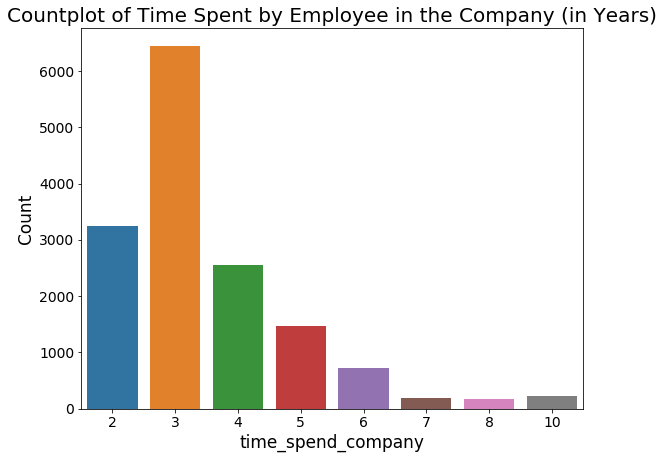

In [14]:
# Countplot for number of years an Employee has spent in the company

count_plotter(df,'time_spend_company','Time Spent by Employee in the Company (in Years)')

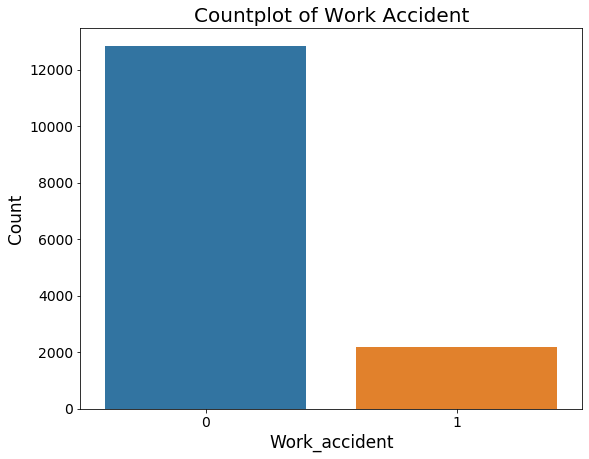

In [15]:
# Countplot of Work Accidents occured with Employees

count_plotter(df,'Work_accident','Work Accident')

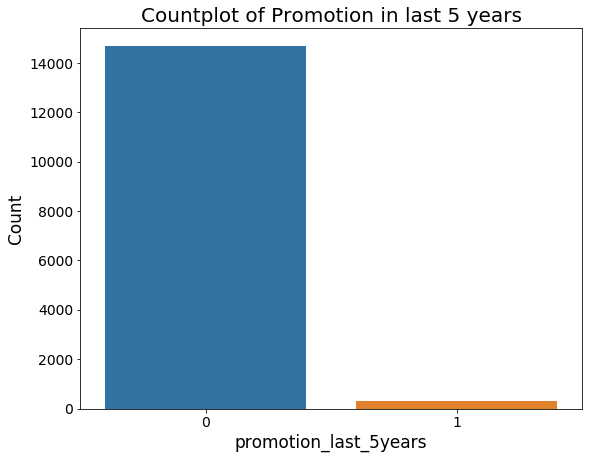

In [16]:
# Countplot showing whether Employee received a promotion in last 5 years

count_plotter(df,'promotion_last_5years','Promotion in last 5 years')

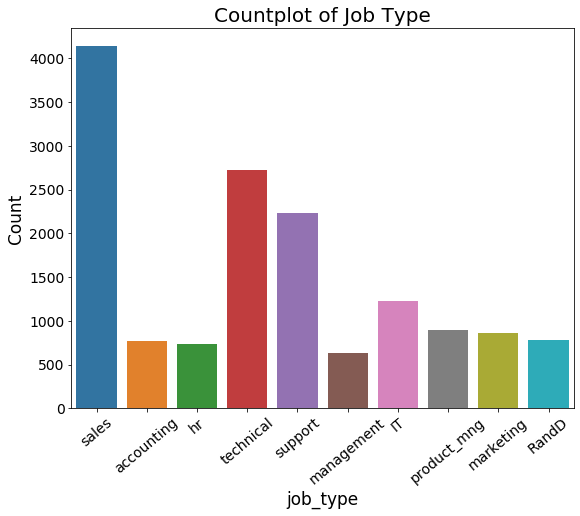

In [17]:
# Countplot of Job type of Employees

count_plotter(df,'job_type','Job Type',40)

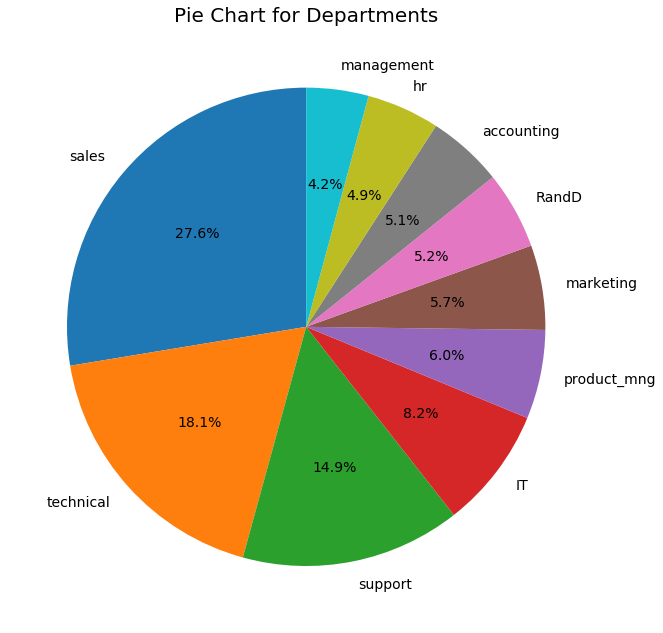

In [18]:
# Pie Chart for Job Departments

labels = df.job_type.value_counts().index.tolist()
sizes = df.job_type.value_counts().values.tolist()

plt.figure(figsize=[11,11])
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 14})
plt.title('Pie Chart for Departments',fontsize=20);

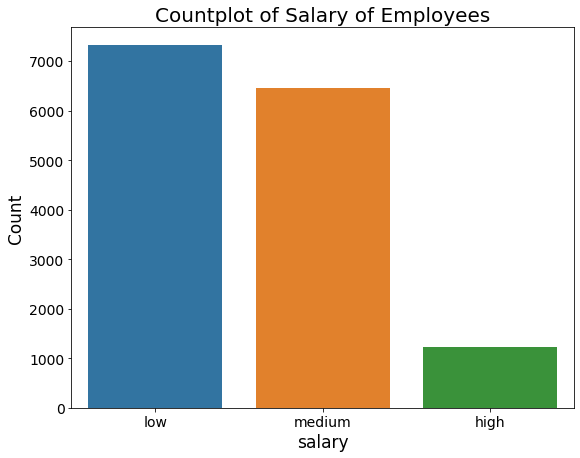

In [19]:
# Countplot of Salary of Employees

count_plotter(df,'salary','Salary of Employees')

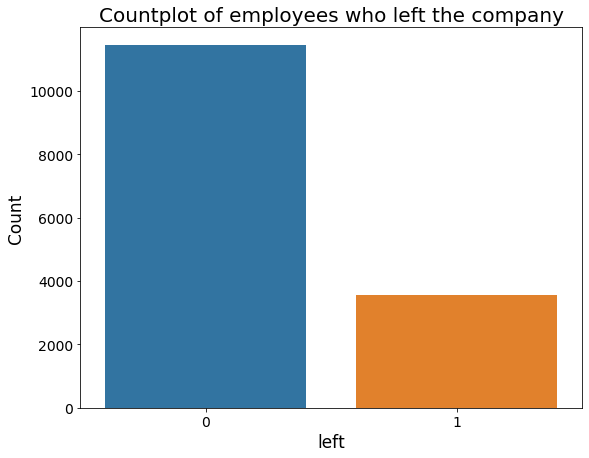

In [20]:
# Countplot of employees who left the company in the past

count_plotter(df,'left','employees who left the company')

## Bivariate Analysis

In [21]:
# View first 5 rows of dataset

df.head()

,emp_id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,job_type,salary,left,satisfaction
0,EMP1,0.38,0.53,2,157,3,0,0,sales,low,1,Not Satisfied
1,EMP2,0.80,0.86,5,262,6,0,0,sales,medium,1,Satisfied
2,EMP3,0.11,0.88,7,272,4,0,0,sales,medium,1,Not Satisfied
3,EMP4,0.72,0.87,5,223,5,0,0,sales,low,1,Satisfied
4,EMP5,0.37,0.52,2,159,3,0,0,sales,low,1,Not Satisfied


In [22]:
# Function for creating boxplots

def box_plotter(df,col1,col2,title):
    
    plt.figure(figsize=[9,7])
    sns.boxplot(x=col1,y=df[col2],data=df)
    plt.title("\nBoxplot for {0}".format(title),fontsize=20)
    plt.xlabel(col1,fontsize=17)
    plt.ylabel(col2,fontsize=17)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    return plt.show() 

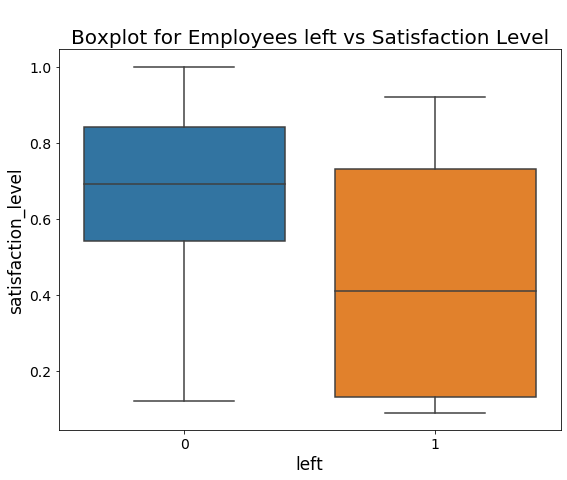

In [23]:
# Examining whether satisfaction level is a factor for employees leaving the organization

box_plotter(df,'left','satisfaction_level','Employees left vs Satisfaction Level')

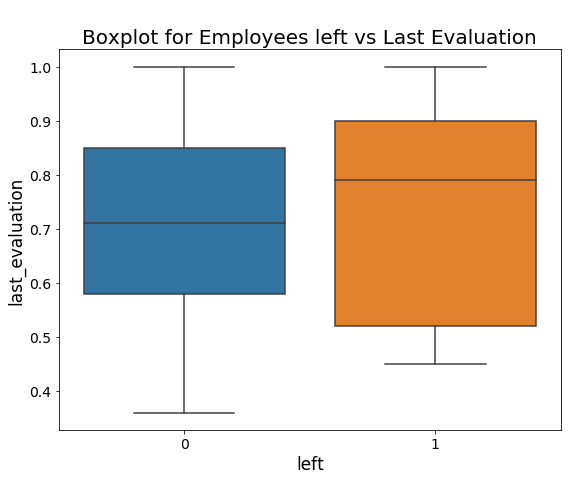

In [24]:
# Checking if Last evaluation has a role in the leaving of Employees

box_plotter(df,'left','last_evaluation','Employees left vs Last Evaluation')

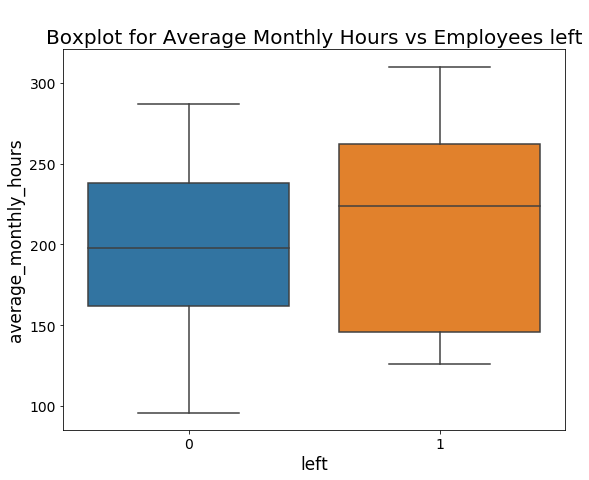

In [25]:
# Checking average monthly hours put by employees who left vs employyees still working

box_plotter(df,'left','average_monthly_hours','Average Monthly Hours vs Employees left')

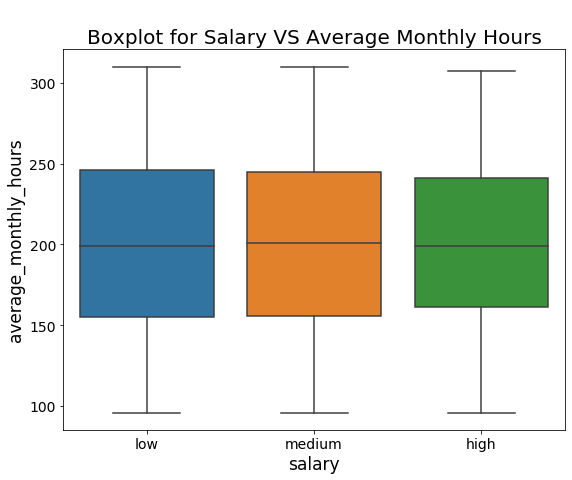

In [26]:
# Boxplot for monthly average working hours to salary of the employee

box_plotter(df,'salary','average_monthly_hours','Salary VS Average Monthly Hours')

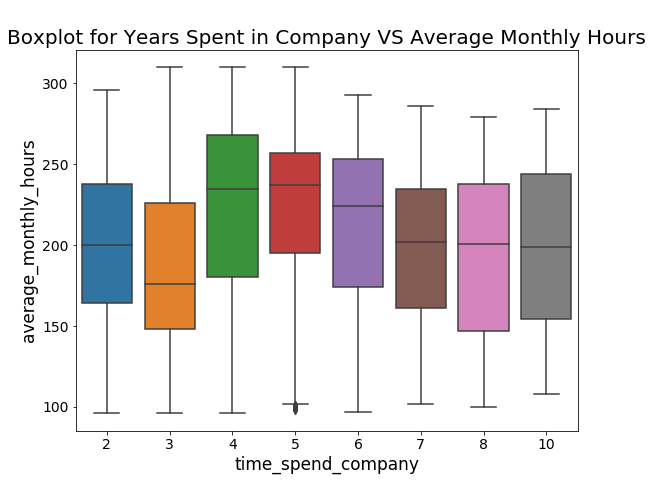

In [27]:
# Bocplot for Years Spent in company vs Average monthly hours

box_plotter(df,'time_spend_company','average_monthly_hours','Years Spent in Company VS Average Monthly Hours')

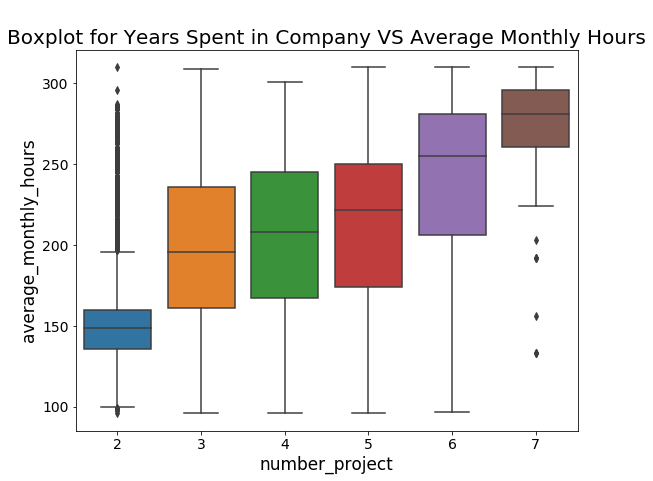

In [28]:
# Bocplot for number of projects vs Average monthly hours

box_plotter(df,'number_project','average_monthly_hours','Years Spent in Company VS Average Monthly Hours')

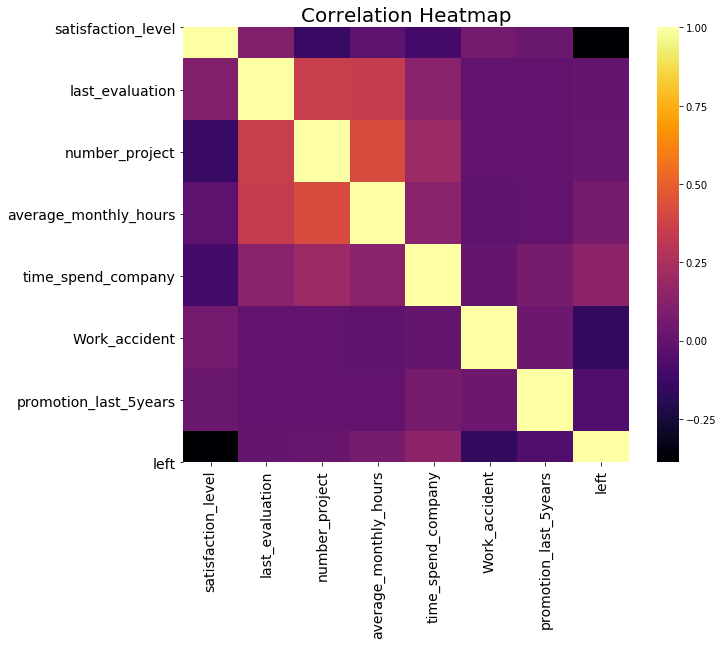

In [29]:
# Correlation Heatmap of the data

plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),cmap='inferno')
plt.title('Correlation Heatmap',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [30]:
df.head()

,emp_id,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,job_type,salary,left,satisfaction
0,EMP1,0.38,0.53,2,157,3,0,0,sales,low,1,Not Satisfied
1,EMP2,0.80,0.86,5,262,6,0,0,sales,medium,1,Satisfied
2,EMP3,0.11,0.88,7,272,4,0,0,sales,medium,1,Not Satisfied
3,EMP4,0.72,0.87,5,223,5,0,0,sales,low,1,Satisfied
4,EMP5,0.37,0.52,2,159,3,0,0,sales,low,1,Not Satisfied


### Link

https://thecleverprogrammer.com/2020/07/12/employee-turnover-prediction/